ANALYSIS 2

DETECTING OUTLINERS AND PLOTTING BOXPLOT

In [1]:
%matplotlib inline

In [2]:
# imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 40)
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import plotly.express as px
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore');

In [3]:
df = pd.read_csv("CARS.csv")

In [4]:
df.tail(5)      

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
423,Volvo,C70 LPT convertible 2dr,Sedan,Europe,Front,"$40,565","$38,203",2.4,5.0,197,21,28,3450,105,186
424,Volvo,C70 HPT convertible 2dr,Sedan,Europe,Front,"$42,565","$40,083",2.3,5.0,242,20,26,3450,105,186
425,Volvo,S80 T6 4dr,Sedan,Europe,Front,"$45,210","$42,573",2.9,6.0,268,19,26,3653,110,190
426,Volvo,V40,Wagon,Europe,Front,"$26,135","$24,641",1.9,4.0,170,22,29,2822,101,180
427,Volvo,XC70,Wagon,Europe,All,"$35,145","$33,112",2.5,5.0,208,20,27,3823,109,186


Checking the types of data

In [5]:
df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

 Dropping the duplicate rows

In [6]:
df.shape

(428, 15)

In [7]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


Now let us remove the duplicate data because it's ok to remove them.

In [8]:
df.count()      # Used to count the number of rows

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

In [9]:
df = df.drop_duplicates()
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [10]:
df.count()

Make           428
Model          428
Type           428
Origin         428
DriveTrain     428
MSRP           428
Invoice        428
EngineSize     428
Cylinders      426
Horsepower     428
MPG_City       428
MPG_Highway    428
Weight         428
Wheelbase      428
Length         428
dtype: int64

Dropping the missing or null values.

In [11]:
print(df.isnull().sum())

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [12]:
df = df.dropna()    # Dropping the missing values.
df.count()

Make           426
Model          426
Type           426
Origin         426
DriveTrain     426
MSRP           426
Invoice        426
EngineSize     426
Cylinders      426
Horsepower     426
MPG_City       426
MPG_Highway    426
Weight         426
Wheelbase      426
Length         426
dtype: int64

In [13]:
print(df.isnull().sum())   # After dropping the values

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      0
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


Converting the object values to integer type.

While having a look at the data, the MSRP was stored as an object type. This is a serious problem because it is impossible to plot those values on a graph because it is a primary requirement that during plotting a graph all the values must be of type integer data. I have to remove the formatting and then convert them to an integer.

In [14]:
# Removing the formatting
df['MSRP'] = [x.replace('$', '') for x in df['MSRP']] 
df['MSRP'] = [x.replace(',', '') for x in df['MSRP']]  

In [15]:
df['MSRP']=pd.to_numeric(df['MSRP'],errors='coerce')

Detecting Outliers

An outlier is a point or set of points different from other points. Sometimes they can be very high or very low. It’s often a good idea to detect and remove the outliers. Because outliers are one of the primary reasons for resulting in a less accurate model. Hence it’s a good idea to remove them. I will perform the IQR score technique to detect and remove the outliers. Often outliers can be seen with visualizations using a box plot. Shown below is the box plot of MSRP. In the plot, you can find some points are outside the box they are none other than outliers.

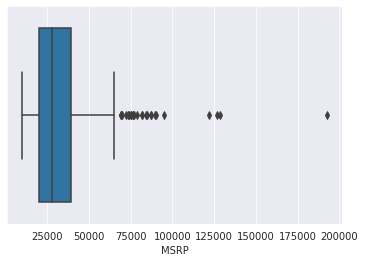

In [16]:
sns.boxplot(x=df['MSRP'])

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

MSRP           18900.25
EngineSize         1.50
Cylinders          2.00
Horsepower        90.00
MPG_City           4.75
MPG_Highway        5.00
Weight           868.00
Wheelbase          9.00
Length            16.00
dtype: float64


In [18]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

After using the technique now as seen below the MSRP box plot contains no outlier points this is a big improvement. Previously there were over 15 points of outliers now I have removed those outliers.

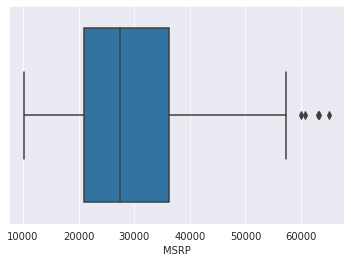

In [19]:
sns.boxplot(x=df['MSRP'])